<a href="https://colab.research.google.com/github/Klearpixeloff/Machine-Learning-Notes/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN(K-Nearest Neighbours)**

**KNN** = It's a Supervised Machine Learning Algorithm that can be used to solve Classification and Regression problem.


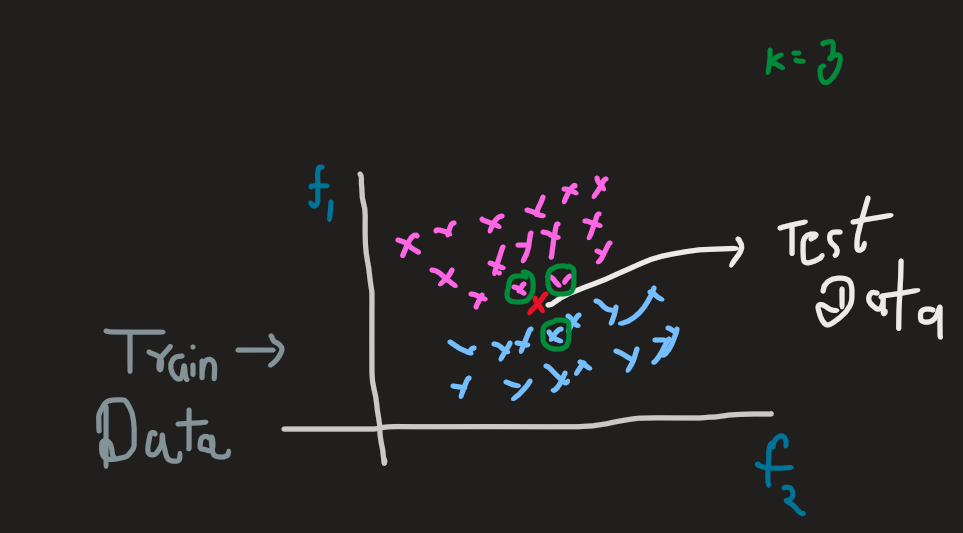


**kNN classifier** determines the class of a data point by majority voting principle. If k is set to 3, the classes of 3 closest points are checked. Prediction is done according to the majority class. 

**kNN regression** takes the mean value of 3 closest points.



The distance between data points is measured. 


1. Euclidean distance

2. Manhattan distance

3. Minkowski distance 

4. Hamming distance

# **Euclidean distance(L2)**


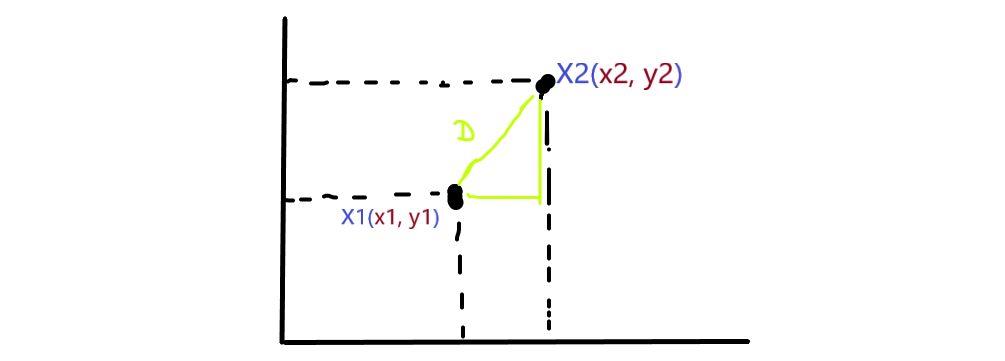





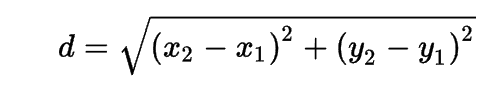

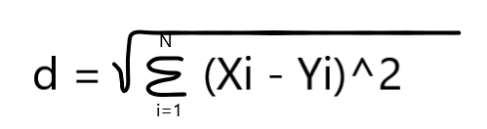

# **Manhattan distance (L1)**



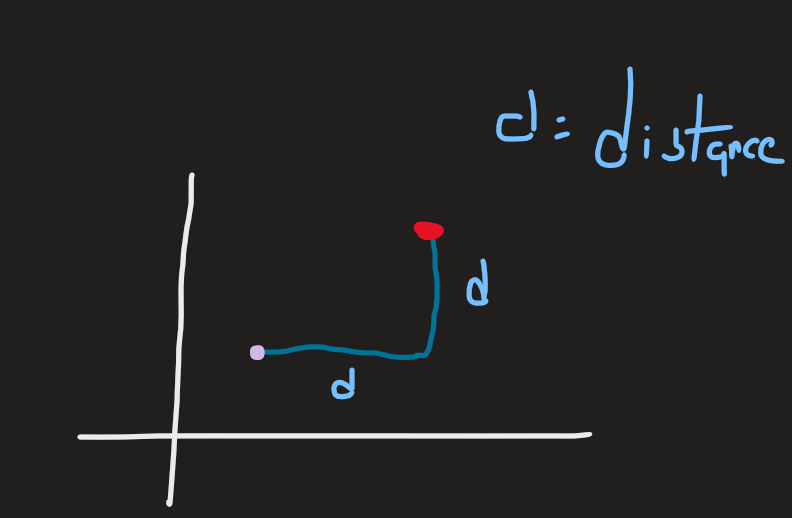

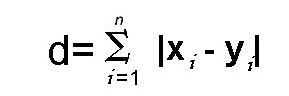

Suppose we have two points as shown in the image the red(4,4) and the Pink(1,1).


d = |4-1| + |4-1| = 6

# **Minkowski distance**(L1 and L2)

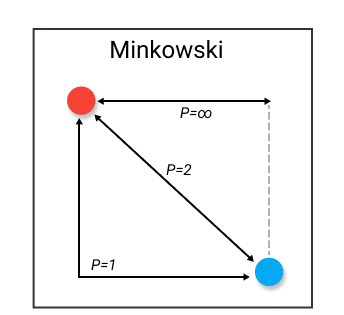

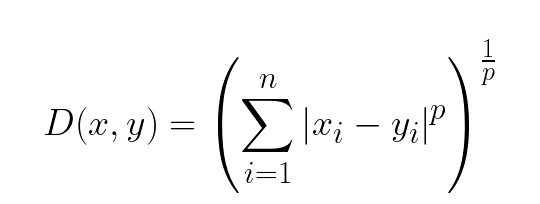





p=1 — Manhattan distance

p=2 — Euclidean distance

p=∞ — Chebyshev distance

# **WORKING**

Step-1: Select the number K of the neighbors
using Grid Search CV

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category
.
Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready.

# Advantages

It is simple to implement.

It is robust to the noisy training data

It can be more effective if the training data is large.

# Disadvantages

Always needs to determine the value of K which may be complex some time.

The computation cost is high because of calculating the distance between the data points for all the training samples.

# **Python Implementation**

# **importing Libraries**

In [54]:
import pandas as pd #data operation
import numpy as np # number operation
import matplotlib.pyplot as plt #data visualization
import seaborn as sns#data visualization
from sklearn.model_selection import train_test_split # for splitting
from sklearn.neighbors import KNeighborsClassifier  #knn classifier
from sklearn.metrics import confusion_matrix,roc_curve,accuracy_score #model evaluating matrics
from sklearn.model_selection import GridSearchCV


# Data Loading

In [10]:
df = pd.read_csv("drive/MyDrive/diabetes.csv")

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# description



**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure** : Diastolic blood pressure (mm Hg)


**SkinThickness**: Triceps skin fold thickness (mm)



**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1


# know the data

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.shape#768 rows and 9 features

(768, 9)

In [16]:
df.isnull().sum()# there is no null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.size # m x n = 768 x 9 = 6912

6912

# Data Preprocessing

In [17]:
dependent_variable= 'Outcome'
independent_variable = list(set(df.columns.tolist())-{dependent_variable})

In [18]:
x = df[independent_variable].values
y = df[dependent_variable].values

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42, stratify=y)

# Find the Best Value of K

**ERROR**

In [32]:
err=[]
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  err.append(np.mean(pred_i!=y_test))

  # why we use this ! 
  # because we need error  and in this problem error is that which is not equal in y_test value

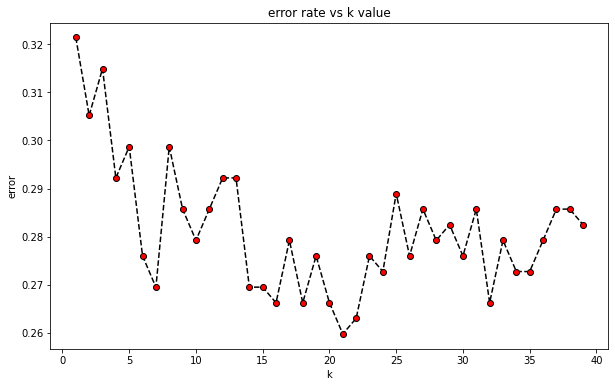

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err,color='black',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('error rate vs k value')
plt.xlabel('k')
plt.ylabel('error')
plt.show()

In [43]:
print("minimum error : - ",min(err),"at the value of k =",err.index(min(err)))

minimum error : -  0.2597402597402597 at the value of k = 20


**accuracy**

In [45]:
acc=[]
for i in range(1,40):
  neigh=KNeighborsClassifier(n_neighbors=i)
  neigh.fit(x_train,y_train)
  y_pred_n = neigh.predict(x_test)
  acc.append(accuracy_score(y_test,y_pred_n))
  

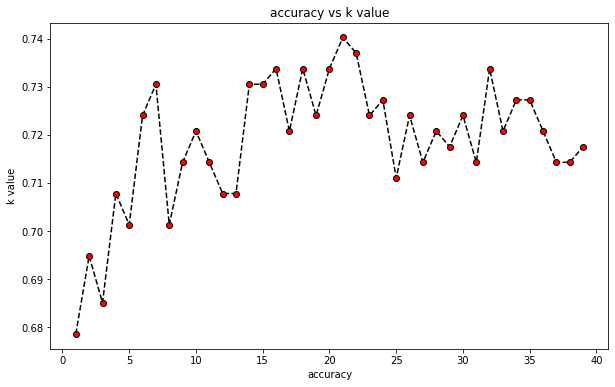

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color='black',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title("accuracy vs k value")
plt.xlabel("accuracy")
plt.ylabel("k value")
plt.show()

In [49]:
print("maximum accuracy = ",max(acc),"at the value of k=",acc.index(max(acc)))

maximum accuracy =  0.7402597402597403 at the value of k= 20


# finding k value using GridSearchCV

In [50]:
parameter={'n_neighbors':np.arange(1,40)}

In [51]:
nei = KNeighborsClassifier()

In [57]:

knn_grid = GridSearchCV(nei,param_grid=parameter,cv=5)

In [58]:
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [59]:
y_pred=knn_grid.predict(x_test)

In [60]:
accuracy_score(y_pred,y_test)

0.7337662337662337

In [61]:
knn_grid.best_params_

{'n_neighbors': 16}

In [62]:
knn_grid.best_score_

0.7608695652173914